<a href="https://colab.research.google.com/github/kimgeonhee317/nlpdemystifed-notes/blob/main/notebook/12_Word_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12_Word Vectors

### Import Library

In [4]:
# upgrade the gensim
!pip install -U gensim==4.*

In [5]:
# Import library
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf

from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

## Using Pretrained, Third-Party Vectors

In [65]:
# There are a variety of pretrained, static word vector packages out there. we'll use Google News vectors (3m * 300 vectors)
!gdown "https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku"

Downloading...
From: https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:21<00:00, 76.3MB/s]


In [7]:
embedding_file = './GoogleNews-vectors-negative300.bin.gz'

In [8]:
# gensim keyedvector to load file
%%time
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=200000)

CPU times: user 3.27 s, sys: 184 ms, total: 3.45 s
Wall time: 3.45 s


In [9]:
pizza = word_vectors['pizza']
print(f'Vector dimension: {pizza.shape}')
print(pizza)

Vector dimension: (300,)
[-1.25976562e-01  2.53906250e-02  1.66992188e-01  5.50781250e-01
 -7.66601562e-02  1.28906250e-01  1.02539062e-01 -3.94821167e-04
  1.21582031e-01  4.32128906e-02  1.72851562e-01 -6.83593750e-02
  3.41796875e-01  8.39843750e-02  6.68945312e-02  2.67578125e-01
 -3.71093750e-02 -5.56640625e-02  1.80664062e-01  1.90429688e-02
 -5.07812500e-02  9.03320312e-03  1.76757812e-01  6.49414062e-02
 -6.25000000e-02 -9.42382812e-02 -9.71679688e-02  4.00390625e-01
  1.15234375e-01  1.02539062e-01 -1.86767578e-02 -2.69531250e-01
  1.80664062e-01  1.25000000e-01 -3.17382812e-02 -5.49316406e-02
  3.45703125e-01 -1.57470703e-02  1.82390213e-05  2.07031250e-01
 -1.25976562e-01 -2.83203125e-01  2.00195312e-01  8.34960938e-02
 -4.73632812e-02 -3.11279297e-02 -2.61718750e-01  1.69921875e-01
 -2.02636719e-02  1.53320312e-01 -1.20605469e-01  3.75000000e-01
 -5.68847656e-02 -4.76074219e-03 -1.95312500e-01 -2.03125000e-01
  3.00781250e-01 -1.01074219e-01 -3.18359375e-01 -9.03320312e-02


In [10]:
print(word_vectors.similarity('pizza', 'gorilla'))
print(word_vectors.similarity('pizza', 'tree'))
print(word_vectors.similarity('pizza', 'yoga'))

0.108518735
0.11185601
0.14119941


In [11]:
try:
  word_vectors['womblyboo']
except KeyError as e :
  print(e)

"Key 'womblyboo' not present"


In [12]:
# n_similarity takes list of words, calculate the average of its word vectors, and use the results as an embedding for the whole sentence
word_vectors.n_similarity("dog bites man".split(), "canine nips human".split())

0.5314661

In [13]:
word_vectors.n_similarity("dog bites man".split(), "man bites dogs".split())

0.96640766

In [14]:
word_vectors.most_similar(positive=['Seoul'], topn=10)

[('South_Korea', 0.722474217414856),
 ('South_Korean', 0.7076618075370789),
 ('Busan', 0.706099808216095),
 ('Pyongyang', 0.699173092842102),
 ('Tokyo', 0.6930851936340332),
 ('Incheon', 0.6747581362724304),
 ('Korea', 0.6671159863471985),
 ('Korean', 0.6570852994918823),
 ('Gwangju', 0.646643877029419),
 ('Daejeon', 0.6390956044197083)]

In [15]:
word_vectors.doesnt_match(["apple", "orange", "hamburger", "banana", "kiwi"])

'hamburger'

In [16]:
word_vectors.doesnt_match(["Microsoft", "Apple", "Hyundai", "Amazon", "Netflix", "Google"])

'Hyundai'

In [17]:
def display_pca_scatterplot(model, words):
  word_vectors = np.array([model[w] for w in words])

  twodim = PCA().fit_transform(word_vectors)[:, :2] # all row, until second col

  plt.figure(figsize=(10,10))
  plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r', s=64)
  for word, (x,y) in zip(words, twodim): # word for each points
    plt.text(x+0.05, y+0.05, word)

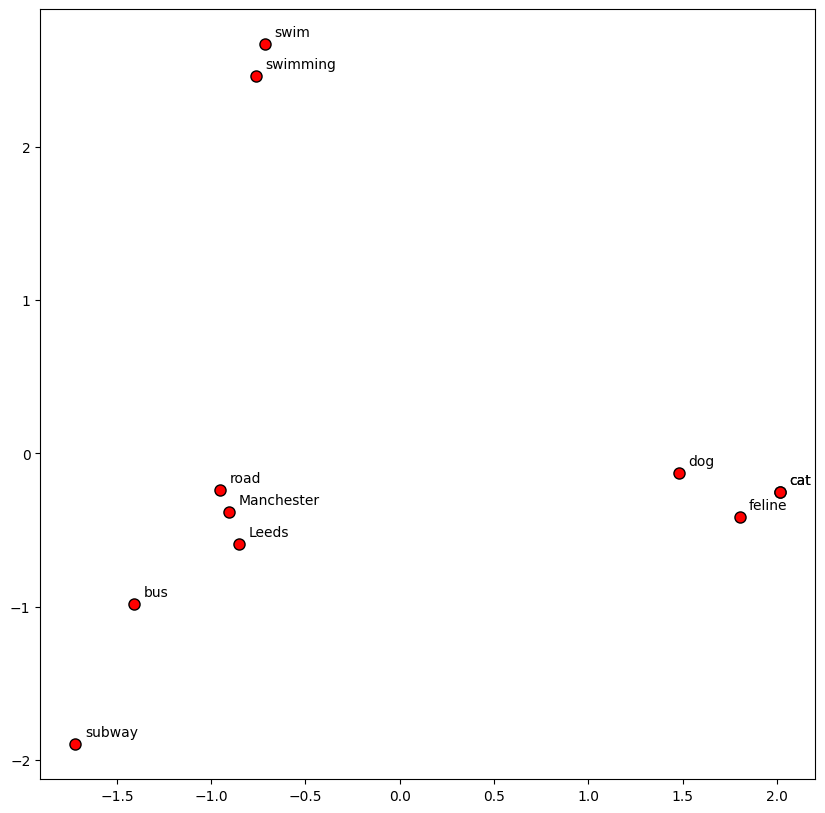

In [18]:
words = ["swim", "swimming", "cat", "dog", "feline", "road", "cat", "bus", "subway", "Manchester", "Leeds"]
display_pca_scatterplot(word_vectors, words)

In [19]:
word_vectors.most_similar(positive=['Italy', 'London'], negative=['Rome'], topn=3)

[('UK', 0.6230568885803223),
 ('Britain', 0.6016390323638916),
 ('United_Kingdom', 0.534345805644989)]

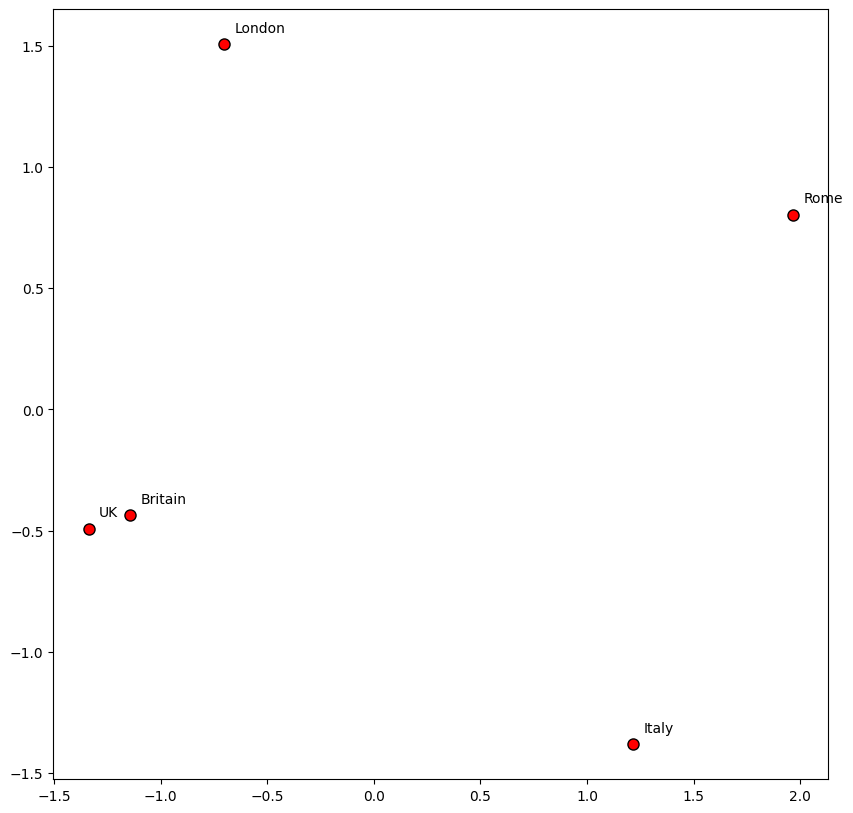

In [20]:
display_pca_scatterplot(word_vectors, ["Rome", 'Italy', 'London', 'Britain', 'UK'])

## Using Pretrained Word Vectors for Classification

In [21]:
%%time
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=1000000)

CPU times: user 20.5 s, sys: 1.05 s, total: 21.6 s
Wall time: 26.8 s


In [66]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz"

--2023-08-10 14:15:55--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.172.104, 52.216.33.224, 52.216.76.78, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.172.104|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [67]:
!tar xvzf /root/input/yelp_review_polarity_csv.tgz
!pwd

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv
/content


In [70]:
yelp_train = pd.read_csv('yelp_review_polarity_csv/train.csv', names=['sentiment', 'review'])
print(yelp_train.shape)

(560000, 2)


In [25]:
yelp_train

,sentiment,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


In [26]:
TRAIN_SIZE = 100000
yelp_train = yelp_train.sample(frac=1, random_state=412)[:TRAIN_SIZE].copy()
print(yelp_train.shape)

(100000, 2)


In [27]:
yelp_train['sentiment'].replace(to_replace=1, value=0, inplace=True)
yelp_train['sentiment'].replace(to_replace=2, value=1, inplace=True)

In [28]:
yelp_train.head()

,sentiment,review
502542,1,There seems to be a long wait and the prices a...
148794,1,Located in the Venetian hotel - this restauran...
8934,0,This place doesn't come close to living up to ...
86893,0,I wanted to write a review concerning a recent...
472166,1,I am so glad I found this place!! Extremely fa...


In [29]:
# create train, val dataset
yelp_train_split, yelp_val_split = train_test_split(yelp_train, train_size=0.85, random_state=1)

In [30]:
#train
train_reviews = yelp_train_split['review']
y_train = np.array(yelp_train_split['sentiment'])

In [31]:
#val
val_reviews = yelp_val_split['review']
y_val = np.array(yelp_val_split['sentiment'])

In [32]:
# quick sanity check to make sure if data is evenly distributed or skewed a bit
collections.Counter(y_train)

Counter({1: 42642, 0: 42358})

In [33]:
# quick tokenizing
tokenizer = keras.preprocessing.text.Tokenizer(num_words=20000,
                                               filters='0123456789!#$%^&*()_+,./:;<=>?[\]`{|}\'~',
                                               lower=True)

In [34]:
%%time
tokenizer.fit_on_texts(train_reviews)

CPU times: user 8.57 s, sys: 44.8 ms, total: 8.61 s
Wall time: 10.6 s


In [35]:
# generate sequences using tokenizer
X_train = tokenizer.texts_to_sequences(train_reviews)

In [36]:
len(X_train[0]) # length of first sequence

109

In [37]:
[tokenizer.index_word[x] for x in X_train[0][:3]] # first three words occuring in the first sequence

['it', 's', 'definitely']

In [38]:
tokenizer.sequences_to_texts([X_train[0]])

['it s definitely cheap compared to other hotels in dt phoenix we weren t in the hotel much anyway because we were traveling n nas with any hotel - you get what you pay for the hotel is old n n-the shower water was cold the first night that we got there interestingly they give you body lotion shampoo body wash and soap maybe it s to make up for everything else in the bathroom being so old n n-there s a nice little pool with chairs and space on an open air roof n noverall a good experience and i would highly recommend it to the budget traveler']

In [39]:
# Original review text
train_reviews.iloc[0]

"It's definitely cheap compared to other hotels in DT Phoenix.  We weren't in the hotel much anyway because we were traveling.\\n\\nAs with any hotel - you get what you pay for.  The hotel is old.\\n\\n-The shower water was cold the first night that we got there.  Interestingly they give you Rusk body lotion, shampoo, body wash, and soap.  Maybe it's to make up for everything else in the bathroom being so old.\\n\\n-There's a nice little pool with chairs and space on an open air roof.\\n\\nOverall a good experience and I would highly recommend it to the budget traveler."

In [40]:
# We need to pad(or truncate) the review vector to make its length infused as same length

MAX_REVIEW_LEN = 200
X_train = keras.utils.pad_sequences(X_train, maxlen=MAX_REVIEW_LEN)


In [41]:
print(X_train[0])
print(X_train[1])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     7    25   173   446  1177
     4    85  1104    10 14750   640    15   612    21    10     1   206
   108   885    76    15    28  2994    12   978    20   137   206    74
    16    44    64    16   276     9     1   206    11   261    12  3761
  1154   296     6   381     1   109   134    13    15    82    33 10588
    18   164    16  1684  4784  4053  1684  1041     2  3291   277     7
    25     4   132    54     9   189   257    10   

In [42]:
X_val = tokenizer.texts_to_sequences(val_reviews)
X_val = keras.utils.pad_sequences(X_val, maxlen=MAX_REVIEW_LEN)

In [43]:
print(tokenizer.word_index['good'])

36


In [44]:
print(tokenizer.index_word[36])

good


In [45]:
print(word_vectors[tokenizer.index_word[36]][:50])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [46]:
# number of tokens (+1 for padding token)
num_tokens = len(tokenizer.word_index)+1

# Initialize embedding layer matrix : num of vocabs * embedding dimension ( V * emb)
# one-hot encoded sequence matrix would be inputted to embedding layer ( S * V )
# (S * V) * (V * emb) = (S * emb)
embedding_dim = 300
embedding_matrix = np.zeros((num_tokens, embedding_dim))

# put words vector into embedding matrix
for word, i in tokenizer.word_index.items():
  if word_vectors.has_index_for(word):
    embedding_matrix[i] = word_vectors[word].copy()

In [47]:
print(embedding_matrix[tokenizer.word_index['good']][:50]) # look-up the word 'good'

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [48]:
# keras embedding layer which is trainable
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=MAX_REVIEW_LEN,
    trainable=True
)

[notes]
In this cate we build embedding layer with the embedding matrix we've made (V * E), and make it *trainable*, this make classification model adjust/fine-tune the word vectors as needed for greater performance.

In [49]:
# simple architecture without RNN, we just put global average pooling 1D to sum-up and averaging in sequence's embeddings into 1-embedding
tf.random.set_seed(0)

model = keras.Sequential()

# This layer will output a squence of 300-demension word vector,
# one for each element in the input sequence
model.add(embedding_layer)

# This layer will calculate an average of those vectors
model.add(layers.GlobalAveragePooling1D()) # (S * E) vectors -> (1 * E)

model.add(layers.Dense(128, activation='relu', kernel_initializer = tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(64, activation='relu', kernel_initializer = tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer = tf.keras.initializers.random_normal(seed=1)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
# Just set an example of what's going to happen under the hood to turn review text into a single vector for the dense layer
review = "fantastic papaya steak"
print(f"Review : {review}")

review_sequences = tokenizer.texts_to_sequences([review])
print(f"Review as sequence of integers: {review_sequences}") # it's just sequence number according to the tokenizer

review_embeddings= embedding_layer(np.array(review_sequences))
print(f"Review embeddings shape: (Batch Size: {review_embeddings.shape[0]}, \
Sequence length: {review_embeddings.shape[1]},\
Embedding size : {review_embeddings.shape[2]})")

# How our document will be presented to the rest part of neural net, just averaging
print(f"Average of embeddings (Shape): {np.mean(review_embeddings, axis=1).shape}")


Review : fantastic papaya steak
Review as sequence of integers: [[546, 5644, 314]]
Review embeddings shape: (Batch Size: 1, Sequence length: 3,Embedding size : 300)
Average of embeddings (Shape): (1, 300)


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          32955300  
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,002,149
Trainable params: 33,002,149
Non-trainable params: 0
____________________________________________

In [54]:
# now it's training time for classificication (including fine-tuning of word-vectors)
# we're not using early_stopping to see metrics between train and val sets
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
167/167 [==============================] - 46s 226ms/step - loss: 0.4005 - accuracy: 0.8132 - val_loss: 0.2265 - val_accuracy: 0.9180
Epoch 2/20
167/167 [==============================] - 26s 156ms/step - loss: 0.1917 - accuracy: 0.9292 - val_loss: 0.2048 - val_accuracy: 0.9207
Epoch 3/20
167/167 [==============================] - 19s 116ms/step - loss: 0.1560 - accuracy: 0.9421 - val_loss: 0.2266 - val_accuracy: 0.9082
Epoch 4/20
167/167 [==============================] - 20s 123ms/step - loss: 0.1357 - accuracy: 0.9504 - val_loss: 0.2054 - val_accuracy: 0.9223
Epoch 5/20
167/167 [==============================] - 10s 60ms/step - loss: 0.1223 - accuracy: 0.9565 - val_loss: 0.2200 - val_accuracy: 0.9201
Epoch 6/20
167/167 [==============================] - 8s 51ms/step - loss: 0.1117 - accuracy: 0.9605 - val_loss: 0.2192 - val_accuracy: 0.9196
Epoch 7/20
167/167 [==============================] - 8s 47ms/step - loss: 0.1029 - accuracy: 0.9645 - val_loss: 0.2866 - val_accurac

In [55]:
def plot_train_vs_val_performance(history): # history is model
  training_losses = history.history['loss']
  validation_losses = history.history['val_loss']

  training_accuracy = history.history['accuracy']
  validation_accuracy = history.history['val_accuracy']

  epochs = range(1, len(training_losses) + 1)

  import matplotlib.pyplot as plt
  fig, (ax1, ax2) = plt.subplots(2)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  fig.tight_layout(pad=5.0)

  # plot training - validation loss
  ax1.plot(epochs, training_losses, 'bo', label='Training_Loss')
  ax1.plot(epochs, validation_losses, 'b', label='Validation_Loss')
  ax1.title.set_text('Train vs val loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()


  # plot training - validation accurarcy
  ax2.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
  ax2.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
  ax2.title.set_text('Train vs val accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()

  plt.show()


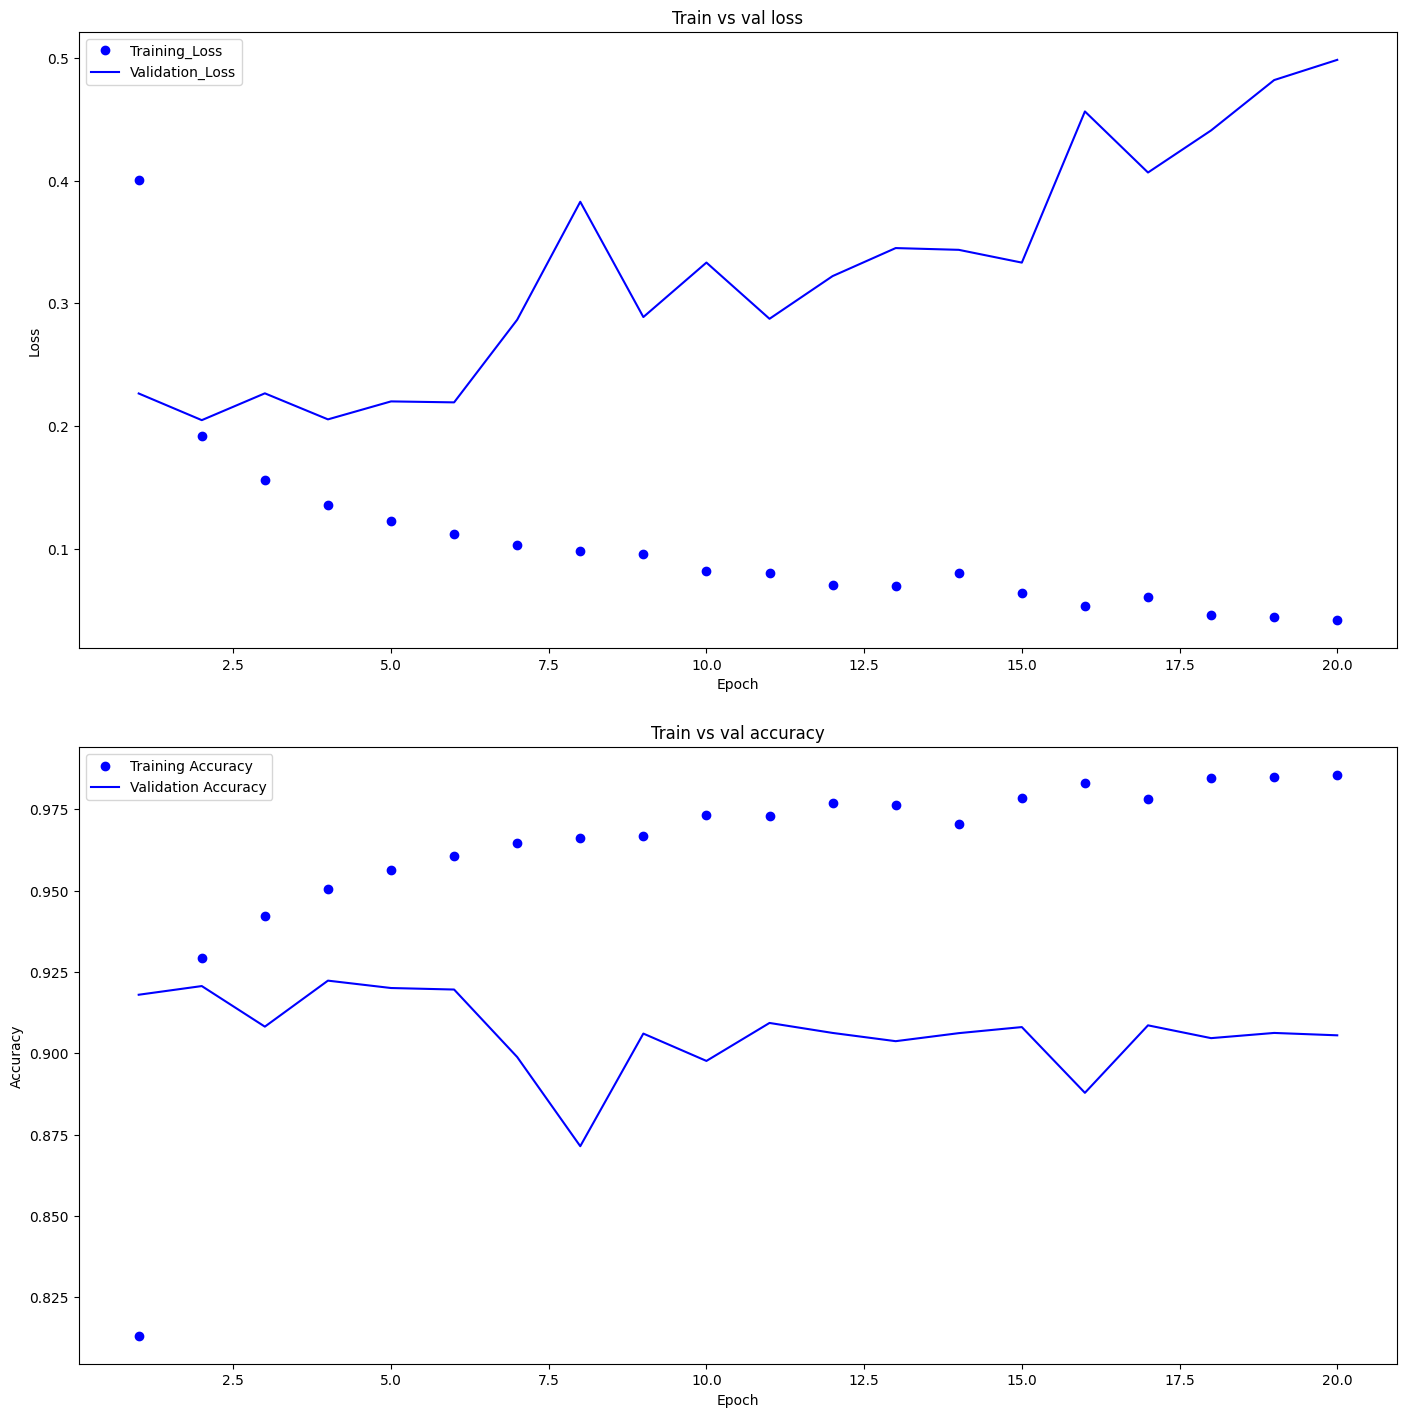

In [56]:
plot_train_vs_val_performance(history)

[notes]\
epoch = 3 is the point where val_loss diverges
We need to initialize a new embedding layer here because we set the learnable parmeter to True in the previous embeddding layer. This means the previous embeddings were almost certainly updated by the learning algorithm. So we're retraining a new model with the original embeddings

In [63]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=MAX_REVIEW_LEN,
    trainable=True
)

model = keras.Sequential()
model.add(embedding_layer)
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=512, validation_data=(X_val, y_val))


Epoch 1/3
167/167 [==============================] - 34s 188ms/step - loss: 0.3629 - accuracy: 0.8410 - val_loss: 0.2210 - val_accuracy: 0.9216
Epoch 2/3
167/167 [==============================] - 23s 136ms/step - loss: 0.1861 - accuracy: 0.9309 - val_loss: 0.2027 - val_accuracy: 0.9206
Epoch 3/3
167/167 [==============================] - 14s 85ms/step - loss: 0.1513 - accuracy: 0.9434 - val_loss: 0.2314 - val_accuracy: 0.9061


[notes]\
Now that we have a trained model, let's try it on the test data
As we did with the training data, we'll:
1. Replace the labels with 0 for native sentiment, and 1 for positive
2. Convert the reviews into a sequence of integers and pad/truncate each review to a fixed length

In [71]:
yelp_test = pd.read_csv('yelp_review_polarity_csv/test.csv', names=['sentiment', 'review'])
print(yelp_train.shape)

yelp_test['sentiment'].replace(to_replace=1, value=0, inplace=True)
yelp_test['sentiment'].replace(to_replace=2, value=1, inplace=True)
yelp_test.head()

(560000, 2)


,sentiment,review
0,1,"Contrary to other reviews, I have zero complai..."
1,0,Last summer I had an appointment to get new ti...
2,1,"Friendly staff, same starbucks fair you get an..."
3,0,The food is good. Unfortunately the service is...
4,1,Even when we didn't have a car Filene's Baseme...


In [72]:
y_test = np.array(yelp_test['sentiment'])
print(y_test)

[1 0 1 ... 0 0 0]


In [73]:
X_test = tokenizer.texts_to_sequences(yelp_test['review'])

In [74]:
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_REVIEW_LEN)

In [75]:
# the result is not not bad for this ismple model where we just average out a review's word vectors(pooling average 1d)
model.evaluate(X_test, y_test)

1188/1188 [==============================] - 5s 4ms/step - loss: 0.2215 - accuracy: 0.9096


[0.22151382267475128, 0.9096052646636963]

In [76]:
# now we can see whether sentiment_analysis model works
def sentiment(reviews):
  seqs = tokenizer.texts_to_sequences(reviews)
  seqs = keras.preprocessing.sequence.pad_sequences(seqs, maxlen=MAX_REVIEW_LEN)
  return model.predict(seqs)

In [77]:
# Real reviews from Google Reviews.
pos_review = "The best seafood joint in East Village San Diego!  Great lobster roll, great fish, great oysters, great bread, great cocktails, and such amazing service.  The atmosphere is top notch and the location is so much fun being located just a block away from Petco Park (San Diego Padres Stadium)."
neg_review = "A thoroughly disappointing experience. When you book a Marriott you expect a certain standard. Albany falls way short. Room cleaning has to be booked 24 hours in advance but nobody thought to mention this at check in. The hotel is tired and needs a face-lift. The only bright light in a sea of mediocrity were the pancakes at breakfast. Sadly they weren't enough to save the experience. If you travel to Albany, then do yourself a big favour and book the Westin."

In [79]:
print(sentiment([pos_review, neg_review]))

1/1 [==============================] - 0s 160ms/step
[[0.99958783]
 [0.00469521]]


## Training New Embeddings and a Model at the Same Time

In [81]:
# For this model, we'll gonna use rnadomly embedded matrix model (not pretrained embeddings)
# We'll use early stopping this time

tf.random.set_seed(0)

model = keras.Sequential()

# The 'trainable' property is True by default.
model.add(layers.Embedding(input_dim=num_tokens,
                           output_dim=embedding_dim,
                           input_length=MAX_REVIEW_LEN))


model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val), callbacks=[es_callback])

Epoch 1/20
167/167 [==============================] - 54s 309ms/step - loss: 0.4266 - accuracy: 0.7828 - val_loss: 0.2171 - val_accuracy: 0.9183
Epoch 2/20
167/167 [==============================] - 19s 117ms/step - loss: 0.1859 - accuracy: 0.9298 - val_loss: 0.2186 - val_accuracy: 0.9095
Epoch 3/20
167/167 [==============================] - 15s 91ms/step - loss: 0.1534 - accuracy: 0.9432 - val_loss: 0.2185 - val_accuracy: 0.9127
Epoch 4/20
167/167 [==============================] - 12s 71ms/step - loss: 0.1320 - accuracy: 0.9526 - val_loss: 0.2092 - val_accuracy: 0.9201
Epoch 5/20
167/167 [==============================] - 16s 93ms/step - loss: 0.1201 - accuracy: 0.9575 - val_loss: 0.2235 - val_accuracy: 0.9193
Epoch 6/20
167/167 [==============================] - 8s 47ms/step - loss: 0.1090 - accuracy: 0.9620 - val_loss: 0.2239 - val_accuracy: 0.9187
Epoch 7/20
167/167 [==============================] - 10s 58ms/step - loss: 0.1015 - accuracy: 0.9654 - val_loss: 0.2959 - val_accuracy

In [82]:
model.evaluate(X_test, y_test)

1188/1188 [==============================] - 3s 3ms/step - loss: 0.2865 - accuracy: 0.8966


[0.2865123748779297, 0.8966052532196045]

## Try This
In our first model, we use pretrained vectors in the embedding layer and set the trainable property to True, allowing the model to fine-tune the word vectors
Instantiate the same model but this time , set the *trainable* parameter *False*. What happens to training performance?
Does the training speed increase or decrease? What happens if you try to add some regularization like dropout?

Other things you can try to see what happens : reduce the number of units, use slower learning rate, reduce the number of hidden layers, reduce the vocabulary, reduce embedding dimenstions, use regularization, use a shorter sequence length.

### 1. Fixed word vector model

In [87]:
# trainable to False
# much faster but much lower accuracies..

tf.random.set_seed(0)

model = keras.Sequential()

# The 'trainable' property is True by default.
model.add(layers.Embedding(input_dim=num_tokens,
                           output_dim=embedding_dim,
                           input_length=MAX_REVIEW_LEN,
                           trainable = False))


model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val), callbacks=[es_callback])


Epoch 1/20
167/167 [==============================] - 3s 7ms/step - loss: 0.6779 - accuracy: 0.5714 - val_loss: 0.6548 - val_accuracy: 0.6144
Epoch 2/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6082 - accuracy: 0.6756 - val_loss: 0.5950 - val_accuracy: 0.6657
Epoch 3/20
167/167 [==============================] - 1s 8ms/step - loss: 0.5552 - accuracy: 0.7177 - val_loss: 0.5437 - val_accuracy: 0.7148
Epoch 4/20
167/167 [==============================] - 1s 7ms/step - loss: 0.5323 - accuracy: 0.7377 - val_loss: 0.5183 - val_accuracy: 0.7521
Epoch 5/20
167/167 [==============================] - 1s 6ms/step - loss: 0.5173 - accuracy: 0.7502 - val_loss: 0.5471 - val_accuracy: 0.7039
Epoch 6/20
167/167 [==============================] - 1s 6ms/step - loss: 0.5118 - accuracy: 0.7512 - val_loss: 0.5001 - val_accuracy: 0.7649
Epoch 7/20
167/167 [==============================] - 1s 6ms/step - loss: 0.5038 - accuracy: 0.7588 - val_loss: 0.4948 - val_accuracy: 0.7720
Epoch 

In [88]:
model.evaluate(X_test, y_test)

1188/1188 [==============================] - 5s 4ms/step - loss: 0.5510 - accuracy: 0.7049


[0.5509707927703857, 0.7048684358596802]

### 2. Reduce the number of hidden layers

In [85]:
# better accuracy?

tf.random.set_seed(0)

model = keras.Sequential()

# The 'trainable' property is True by default.
model.add(layers.Embedding(input_dim=num_tokens,
                           output_dim=embedding_dim,
                           input_length=MAX_REVIEW_LEN,
                           trainable = True))


model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val), callbacks=[es_callback])

Epoch 1/20
167/167 [==============================] - 30s 169ms/step - loss: 0.5057 - accuracy: 0.7289 - val_loss: 0.2476 - val_accuracy: 0.9061
Epoch 2/20
167/167 [==============================] - 20s 120ms/step - loss: 0.2066 - accuracy: 0.9223 - val_loss: 0.2140 - val_accuracy: 0.9125
Epoch 3/20
167/167 [==============================] - 15s 89ms/step - loss: 0.1649 - accuracy: 0.9387 - val_loss: 0.2063 - val_accuracy: 0.9168
Epoch 4/20
167/167 [==============================] - 12s 72ms/step - loss: 0.1428 - accuracy: 0.9475 - val_loss: 0.2032 - val_accuracy: 0.9211
Epoch 5/20
167/167 [==============================] - 7s 44ms/step - loss: 0.1285 - accuracy: 0.9541 - val_loss: 0.2178 - val_accuracy: 0.9183
Epoch 6/20
167/167 [==============================] - 7s 41ms/step - loss: 0.1166 - accuracy: 0.9592 - val_loss: 0.2150 - val_accuracy: 0.9183
Epoch 7/20
167/167 [==============================] - 6s 38ms/step - loss: 0.1093 - accuracy: 0.9622 - val_loss: 0.2453 - val_accuracy: 

In [86]:
model.evaluate(X_test, y_test)

1188/1188 [==============================] - 5s 4ms/step - loss: 0.2348 - accuracy: 0.9153


[0.23476608097553253, 0.9153158068656921]

## Alternative Static Embedding Algorithms


### GloVe
**GloVe (Global Vectors for Word Representation)** is another algorithm for creating static word vectors. You can read the original GloVe paper and download pretrained word vectors here:<br>
https://nlp.stanford.edu/projects/glove/

### Doc2Vec
An algorithm which represents a document as a dense vector which addresses weaknesses of bag-of-words models.<br>
https://arxiv.org/abs/1405.4053<br>
https://radimrehurek.com/gensim/models/doc2vec.html<br>

### fastText
An alternative approach to creating embeddings. Instead of assigning a vector to each _word_ (e.g. a separate vector each for "dog" and "dogs"), a vector is assigned to each _subword_. For fastText, a subword is defined as a character n-gram.
<br><br>
So if n=3, then a word like "hello" would result in vectors for "<he", "hel", "ell", "llo", "lo>" (note that "<" and ">" are special characters). The vector for "hello" would be the sum of all the above vectors. This helps deal with OOV situations because vectors can still be assigned to unseen words as long as the n-grams exist in the vocabulary.<br>
https://fasttext.cc/<br>
https://radimrehurek.com/gensim/models/fasttext.html
<br><br>